In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# import datetime
from datetime import datetime

/Users/ericfesta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


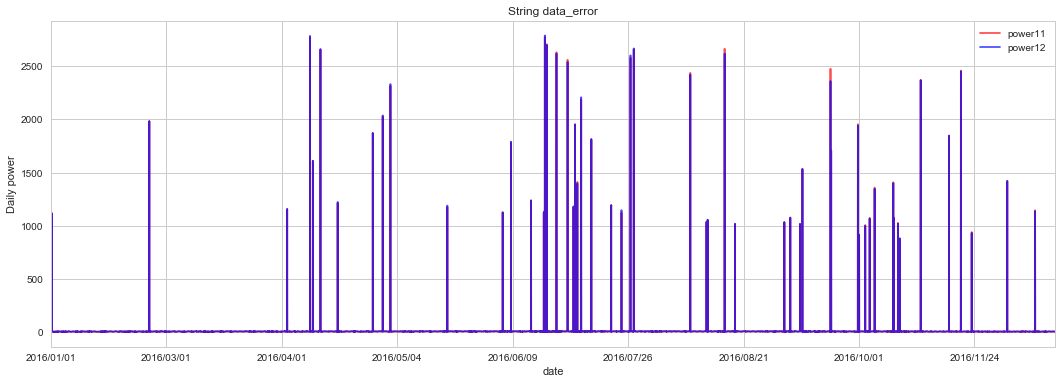

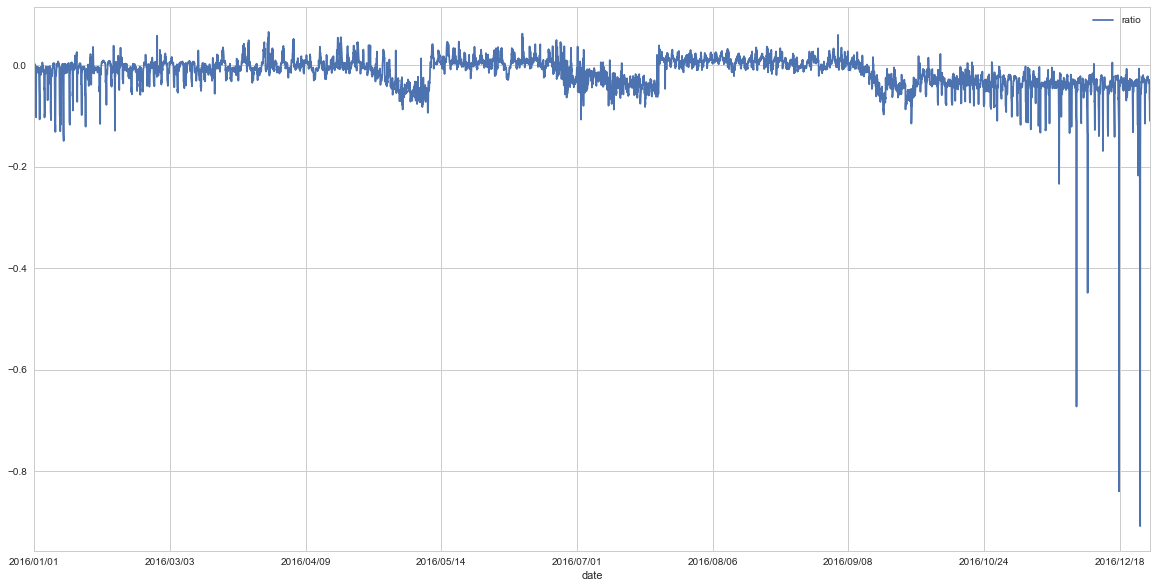

In [2]:
from datetime import datetime

string_data = pd.read_csv('string_data_all.csv', encoding="shift-jis")
string_data2 = string_data.rename(columns={"計測日時": "created", "ストリング11の電力(W)": "power11", "ストリング12の電力(W)": "power12"})
string_data3 = string_data2.ix[:,['created', 'power11', 'power12']]#行指定なし、列（横）を指定
string_data4 = string_data3.dropna()#欠損値を含む　Row（タテ）を除く

dates = []
for created_time in string_data4.created:
    date = datetime.strptime(created_time, '%Y/%m/%d').strftime('%Y/%m/%d')
#     date2 = date.replace('/', '')
#     date3 = int(date2)
#     dates.append(date3)
    dates.append(date)
    
string_data4['date'] = dates
string_data5 = string_data4.drop('created', axis = 1)#createdをdateに変更したので消す
# string_data6 = string_data5.groupby('date').sum()#集計
string_data6 = string_data5.set_index(['date'])

string_data6['ratio'] = (string_data6['power12'] / string_data6['power11'])- 1#１１が正解データ
# string_data6['error'] = (string_data6['power12'] - string_data6['power11'])#１１が正解データ

string_data7 = string_data6.drop(['power11', 'power12'], axis = 1).dropna()#String６を消す
string_data8 = string_data7.replace(0.0, np.nan) #0をnanに置き換え
string_data9 = string_data8.dropna() #Nanを取り除く

colorlist = ['#FF0000', '#0000FF']
string_data6.plot( y=['power11', 'power12'], figsize=(18,6), alpha=0.7, color=colorlist)
plt.ylabel("Daily power") 
plt.title("String data_error")

# string_data7.plot( y=['error'], figsize=(28, 10), alpha=1)
string_data9.plot( y=['ratio'], figsize=(20, 10), alpha=1)

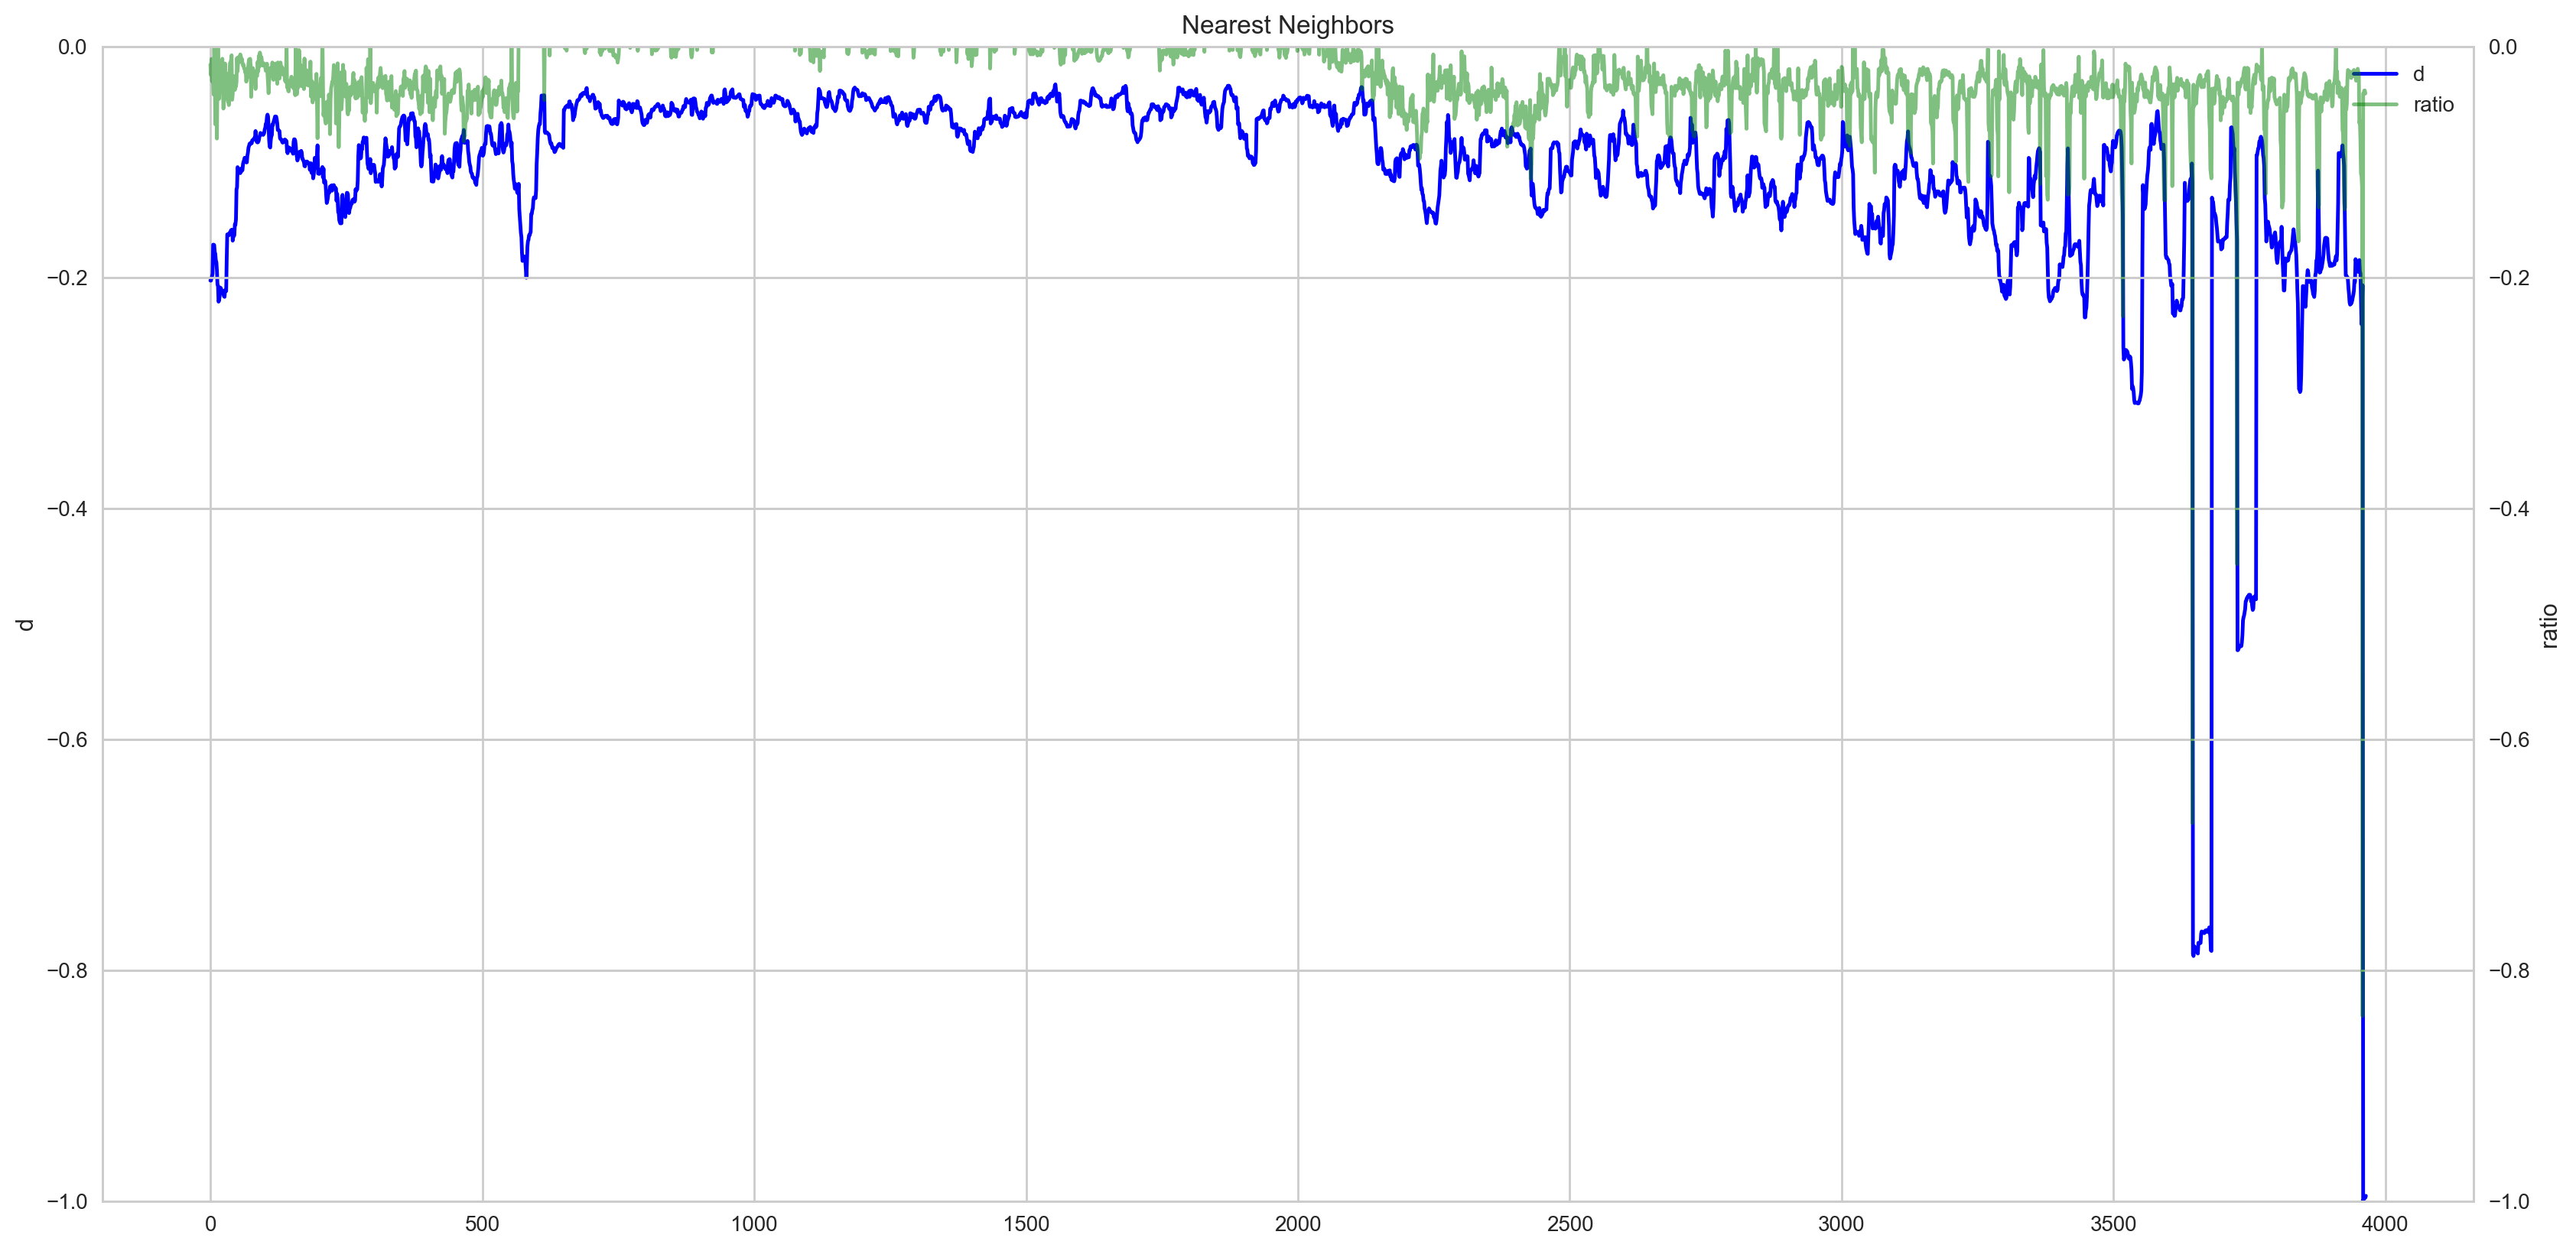

In [6]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from pylab import *
from matplotlib import font_manager

#日本語使いたい場合
fontprop = matplotlib.font_manager.FontProperties(fname="/usr/share/fonts/truetype/fonts-japanese-gothic.ttf")

def embed(lst, dim):
    emb = np.empty((0,dim), float) 
    for i in range(lst.size - dim + 1): 
        tmp = np.array(lst[i:i+dim])[::-1].reshape((1,-1)) 
        emb = np.append( emb, tmp, axis=0)
    return emb

# if __name__ == '__main__':
    # main()

#仮説1:前半を正解とし、後半を異常とする場合
# data = string_data9.values#numpyに変換
# train_data = data[1:4000] 
# test_data = data[4001:8000]#１１=正解data

# #仮説2:power12を正解とし、power11を異常とする場合
# data = string_data6.values#numpyに変換
# train_data = data[:, 0]# power12=正解data
# test_data = data[:, 1]# power11
# width = 100
# nk = 1

#仮説3:9月を異常とし、1~8月を正常とする場合
# data = string_data9.values#numpyに変換
# train_data = data[1:4000] # 1~8
# test_data = data[4001:8000] # 9
# width = 100
# nk = 1

data = string_data9.values#numpyに変換
train_data = data[1:4000] 
test_data = data[4001:8000]#１１=正解data

width = 35
nk = 1

train = embed(train_data, width)
test = embed(test_data, width)

neigh = NearestNeighbors(n_neighbors=nk)
neigh.fit(train)
d = neigh.kneighbors(test)[0]#謎の[0]
# 距離をmax1にするデータ整形
mx = np.max(d)
d = -d / mx
# プロット  
test_for_plot = data[4001+width:8000]
fig = plt.figure(figsize=(20,10), dpi=200)
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

p1, =ax1.plot(d, '-b', alpha=1.0)
ax1.set_ylabel('d')
ax1.set_ylim(-1.0,0)
p2, =ax2.plot(test_for_plot, '-g', alpha=0.5)

ax2.set_ylabel('ratio')
ax2.set_ylim(-1.0,0)
plt.title("Nearest Neighbors")
ax1.legend([p1, p2], ['d','ratio'])
plt.show()

In [27]:
len(d)

3965

In [28]:
8224 - 3965

4259

In [38]:
d[0: 1]

array([[-0.20290027]])

In [39]:
string_data10=string_data9['ratio'].values
for i in range(len(string_data10)):
    ratio = float(string_data10[i: i +1])
    if i > 4259:
        distance = d[i - 4258: i - 4257]
        if ratio < distance:
            print(string_data9[i: i+1])

               ratio
date                
2016/09/16 -0.058252
               ratio
date                
2016/09/16 -0.052925
               ratio
date                
2016/09/16 -0.058667
              ratio
date               
2016/09/16 -0.05615
               ratio
date                
2016/09/16 -0.060559
               ratio
date                
2016/09/16 -0.057252
               ratio
date                
2016/09/16 -0.055394
               ratio
date                
2016/09/16 -0.057971
               ratio
date                
2016/09/16 -0.067308
               ratio
date                
2016/09/16 -0.060484
               ratio
date                
2016/09/16 -0.058333
               ratio
date                
2016/09/16 -0.062189
               ratio
date                
2016/09/16 -0.072398
               ratio
date                
2016/09/16 -0.059761
               ratio
date                
2016/09/17 -0.065789
               ratio
date                
2016/09/17 -0.06